<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**
 - Neurons are the basic unit of a neural network. They take in inputs, apply weights to the inputs, sum the product of the inputs and their weights, then pass the sum through an activation function (such as relu or sigmoid) to either produce an output an input to the next layer.
<br>
- **Input Layer:**
 - The input layer is the first layer of a neural network where the data is passed into the neural network for further processing by other layers.
<br>
- **Hidden Layer:**
 - A hidden layer is a layer between the input and output layers. This layer receives the inputs from the input layer, applies weights to the inputs, and passes the summed product through an activation function. 
<br>
- **Output Layer:**
    - The output layer is the final layer in the neural network. This layer takes in inputs from the previous layer, applies weights, and passes the summed product through an activation function, then outputs a result.
<br>
- **Activation:**
 - The activation function defines the output of a set of inputs that have been weighted and summed (bias might also be added in). Common activation functions are sigmoid and relu. The output from the activation function is called the activated output, which is then subtracted from the true output to determine the error (this is in a supervised learning scenario).
<br>
- **Backpropagation:**
 - The main feature of backpropagation is its iterative, recursive and efficient method of calculating the updated weights to improve the network.

## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [34]:
import pandas as pd
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [35]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. Explain why you could not achieve a higher accuracy with a *simple perceptron*. It's possible to achieve ~95% accuracy on this dataset.

In [36]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy[['ate']].values

In [37]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [46]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        # weights
        self.weight = np.zeros(1 + X.shape[1])
        
        # Number of missclassifications
        self.errors = []
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w !=0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

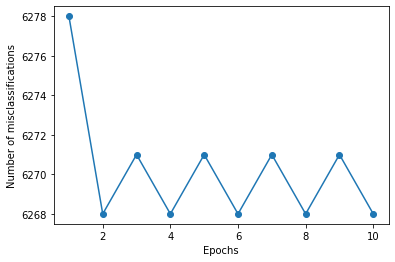

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

pn = Perceptron(0.01, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [48]:
# Inputs
inputs = X

# Correct output
correct_outputs = y

weights = 2 * np.random.random((2,1)) - 1


for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate
    activated_output = sigmoid(weighted_sum)
    
    # calc error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the weights
    weights += np.dot(inputs.T, adjustments)
    
    
print("Weights after training")
print(weights)
print("\n")
print("Output after training")
print(activated_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Weights after training
[[182.49790113]
 [580.34807633]]


Output after training
[[4.05430060e-020]
 [8.55763683e-193]
 [4.05430060e-020]
 ...
 [4.05430060e-020]
 [4.05430060e-020]
 [8.55763683e-193]]


### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [43]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [40]:
class NeuralNetwork:
    def __init__(self, inputs=2, hiddenNodes=4, outputNodes=1):
        # Set up architecture of neural network
        self.inputs = inputs
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        
        # Initial weights
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)       #2x4
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)  #4x1 
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        # Weighted sum of inputs
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        # Error in output
        self.o_error = y - o
        
        # Apply derivative of sigmoid to error
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        # How much error can be explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [41]:
# Train the MLP
nn = NeuralNetwork()

for i in range(10000):
    if (i+1 in [1, 2, 3, 4, 5]) or ((i+1) % 1000 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---' * 3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print('Loss: \n', str(np.mean(np.square(y-nn.feed_forward(X)))))
    nn.train(X, y)

+---------EPOCH 1---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[0.71193103]
 [0.68691116]
 [0.71193103]
 ...
 [0.71193103]
 [0.71193103]
 [0.68691116]]
Loss: 
 0.2886696287651656
+---------EPOCH 2---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[2.77198920e-16]
 [2.13104486e-31]
 [2.77198920e-16]
 ...
 [2.77198920e-16]
 [2.77198920e-16]
 [2.13104486e-31]]
Loss: 
 0.4999999646783289
+---------EPOCH 3---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[2.97527917e-16]
 [2.40048891e-31]
 [2.97527917e-16]
 ...
 [2.97527917e-16]
 [2.97527917e-16]
 [2.40048891e-31]]
Loss: 
 0.49999996254192536
+---------EPOCH 4---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [21]:
X = df.drop(columns='target').to_numpy()
y = df['target'].to_numpy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
# Train a baseline model
# Parameters
inputs = X_train.shape[1]
epochs = 50
batch_size = 10

# Create Model
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(inputs,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit Model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=epochs,
          batch_size=batch_size,
          verbose=True)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 1s 4ms/sample - loss: 18.7386 - accuracy: 0.5331 - val_loss: 8.5042 - val_accuracy: 0.5902
Epoch 2/50
242/242 [==============================] - 0s 396us/sample - loss: 3.8224 - accuracy: 0.5041 - val_loss: 2.3722 - val_accuracy: 0.4098
Epoch 3/50
242/242 [==============================] - 0s 386us/sample - loss: 1.7839 - accuracy: 0.4380 - val_loss: 1.4303 - val_accuracy: 0.5246
Epoch 4/50
242/242 [==============================] - 0s 393us/sample - loss: 1.3259 - accuracy: 0.4669 - val_loss: 1.3316 - val_accuracy: 0.4754
Epoch 5/50
242/242 [==============================] - 0s 373us/sample - loss: 1.2637 - accuracy: 0.4752 - val_loss: 1.2414 - val_accuracy: 0.5574
Epoch 6/50
242/242 [==============================] - 0s 367us/sample - loss: 1.2100 - accuracy: 0.5248 - val_loss: 1.3450 - val_accuracy: 0.3770
Epoch 7/50
242/242 [==============================] - 0s 374us/sample - loss: 1.

In [31]:
# Hyperparameter Tuning with GridSearchCV
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Function to create model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=13, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create model
model = KerasClassifier(build_fn=create_model, verbose=True)

# Define grid search parameters
params = {'batch_size': [10, 20, 30],
          'epochs': [40, 50, 60]}

# Create gridsearch
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Train on 193 samples
Epoch 1/40
193/193 [==============================] - 1s 3ms/sample - loss: 8.1470 - accuracy: 0.4560
Epoch 2/40
193/193 [==============================] - 0s 290us/sample - loss: 1.8110 - accuracy: 0.5026
Epoch 3/40
193/193 [==============================] - 0s 272us/sample - loss: 0.9581 - accuracy: 0.5699
Epoch 4/40
193/193 [==============================] - 0s 277us/sample - loss: 0.7711 - accuracy: 0.5699
Epoch 5/40
193/193 [==============================] - 0s 278us/sample - loss: 0.7237 - accuracy: 0.6218
Epoch 6/40
193/193 [==============================] - 0s 282us/sample - loss: 0.6922 - accuracy: 0.6373
Epoch 7/40
193/193 [==============================] - 0s 276us/sample - loss: 0.6742 - accuracy: 0.6632
Epoch 8/40
193/193 [==============================] - 0s 272us/sample - loss: 0.6691 - accuracy: 0.6528
Epoch 9/40
193/193 [==============================] - 0s 291us/sample - loss: 0.6589 - accuracy: 0.6684
Epoch 10/40
193/193 [========================

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


242/242 [==============================] - 0s 2ms/sample - loss: 10.9316 - accuracy: 0.4669
Epoch 2/50
242/242 [==============================] - 0s 289us/sample - loss: 2.4093 - accuracy: 0.5661
Epoch 3/50
242/242 [==============================] - 0s 282us/sample - loss: 1.3995 - accuracy: 0.6281
Epoch 4/50
242/242 [==============================] - 0s 276us/sample - loss: 1.2027 - accuracy: 0.6240
Epoch 5/50
242/242 [==============================] - 0s 280us/sample - loss: 0.9675 - accuracy: 0.6198
Epoch 6/50
242/242 [==============================] - 0s 287us/sample - loss: 0.7969 - accuracy: 0.6570
Epoch 7/50
242/242 [==============================] - 0s 315us/sample - loss: 0.7240 - accuracy: 0.6281
Epoch 8/50
242/242 [==============================] - 0s 285us/sample - loss: 0.6764 - accuracy: 0.6818
Epoch 9/50
242/242 [==============================] - 0s 284us/sample - loss: 0.6628 - accuracy: 0.6736
Epoch 10/50
242/242 [==============================] - 0s 280us/sample - los

In [32]:
from sklearn.metrics import accuracy_score

y_pred = grid_result.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8032786885245902